<a href="https://colab.research.google.com/github/gabrielxcosta/Physics/blob/main/Computational%20Physics/Project_2_Fresnel_integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

``PROJETO II - Física Computacional: ``
 **GABRIEL FERREIRA DA COSTA - 19.1.4047**
**/ JONAS DE ANDRADE OLIVEIRA  - 19.1.4052**

# ***Visão geral:***

In [ ]:
# Introduzindo ao código as bibliotecas de interesse
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### ***Problema)***  
Ao ser difratada por um semiplano a intensidade luminosa varia com a distância
$x$ da borda de acordo com
$$I(w) = \frac{1}{2} I_{0} {\left\{\left[C(w) + \frac{1}{2} \right] ^ 2 +  \left[S(w) + \frac{1}{2} \right] ^ 2\right\}},$$
onde
$$C(w) = \int_{0}^{x} cos(\frac{\pi w ^ 2}{2}) dw$$
e
$$S(w) = \int_{0}^{x} sen(\frac{\pi w ^ 2}{2}) dw$$
são as $\textbf{integrais de Fresnel}$.

Estude a $\textbf{teoria da difração}$ e verifique as expressões acima. Escreva seus
próprios programas para calcular $I(x)$ utilizando o $\textbf{método de Romberg}$.

In [ ]:
# Criacao de dados
t = np.linspace(0, 5, 201)

# Criacao de funcoes anonimas para representar S(x) e C(x)
c = lambda x: np.cos((np.pi * np.power(x, 2)) / 2)
s = lambda x: np.sin((np.pi * np.power(x, 2)) / 2)
ValC, erroC = sc.integrate.quadrature(c, 0, 10, (), 1e-6)
ValS, erroS = sc.integrate.quadrature(s, 0, 10, (), 1e-6)
print(ValS, DIF(ValS))
print(ValC, DIF(ValC))
I = (1 / 2) * ((ValC + (1 / 2)) ** 2 + (ValS + (1 / 2)) ** 2)
print(I)


# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rc('axes', edgecolor = 'k')

# Plot
fig, ax = plt.subplots(figsize = (12, 8), facecolor = 'k')
plt.plot(t, s(t), 'r-', label = 'S(x)')
plt.plot(t, c(t), 'g--', label = 'C(x)')
plt.fill_between(t, s(t), where = \
                [(t > 0) and (t < 5) for t in t], \
                color = 'r', alpha = 0.3)
plt.fill_between(t, c(t), where = \
                [(t > 0) and (t < 5) for t in t], \
                color = 'g', alpha = 0.3)
plt.title('S(x) e C(x)', size = 20)
ax.grid(True, which = 'both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()

c:\Users\55119\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 7.341079e-02
  warnings.warn(
c:\Users\55119\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.667869e+00
  warnings.warn(


NameError: name 'DIF' is not defined

In [ ]:
c = lambda x: np.cos((np.pi * np.power(x, 2)) / 2)
s = lambda x: np.sin((np.pi * np.power(x, 2)) / 2)
ValC, erroC = sc.integrate.quadrature(c, 0, 12, (), 1e-6)
ValS, erroS = sc.integrate.quadrature(s, 0, 12, (), 1e-6)
print(ValS, DIF(ValS))
print(ValC, DIF(ValC))
I = (1 / 2) * ((ValC + (1 / 2)) ** 2 + (ValS + (1 / 2)) ** 2)
print(I)

2.851052727237402e-13 0.4999999999997149
-0.4087280862887497 0.9087280862887497
0.12916528111639952


c:\Users\55119\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.188780e+00
  warnings.warn(



### ***Contexto)***
#### **Difração de Fresnel**
É o tipo de difração cujo tratamento matemático é mais complexo. Nesse caso, a onda que se desloca não é plana. Para se calcular a distribuição da intensidade da luz difratada em função do ângulo de espalhamento é comum se usar da $\textit{espiral de Cornu}$.

A equação da difração de Fresnel é usada para calcular o padrão de difração criado por ondas passando por uma fenda ou em volta de um objeto, quando visto relativamente próximo do objeto (diz-se que a onda se propaga em um "campo próximo". Esse campo pode ser calculado pelo número de Fresnel). Múltiplas difrações de $\textit{Fresnel}$ podem causar a reflexão especular.

#### **Integrais de Fresnel**



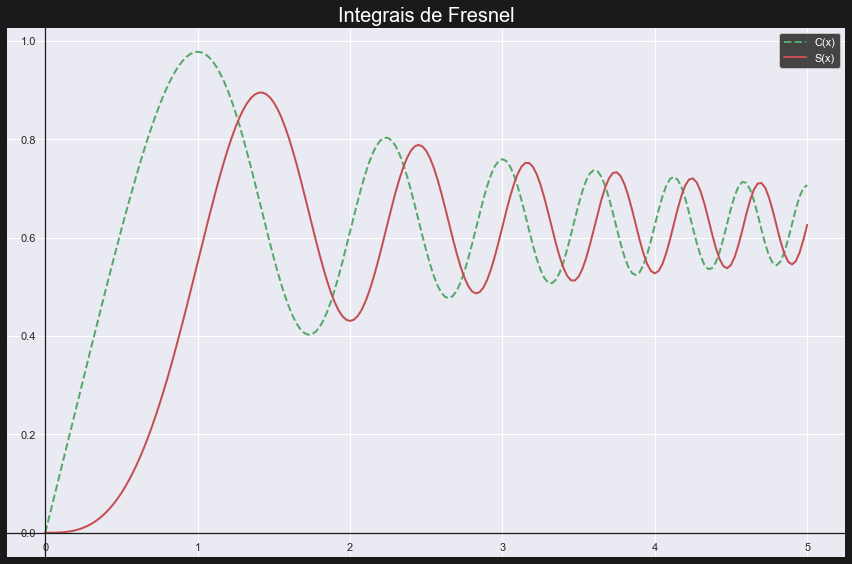

In [ ]:
ss, cc = sc.special.fresnel(t)

scaled_ss = np.sqrt(np.pi / 2) * ss
scaled_cc = np.sqrt(np.pi / 2) * cc

sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rc('axes', edgecolor = 'k')

fig, ax = plt.subplots(figsize = (12, 8), facecolor = 'k')
plt.plot(t, scaled_cc, 'g--', linewidth = 2, label = 'C(x)')
plt.plot(t, scaled_ss, 'r-', linewidth = 2, label = 'S(x)')
plt.grid(True, which = 'both')
plt.title("Integrais de Fresnel", size = 20)
plt.legend(facecolor = 'k', labelcolor = 'w')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.tight_layout()
plt.show()

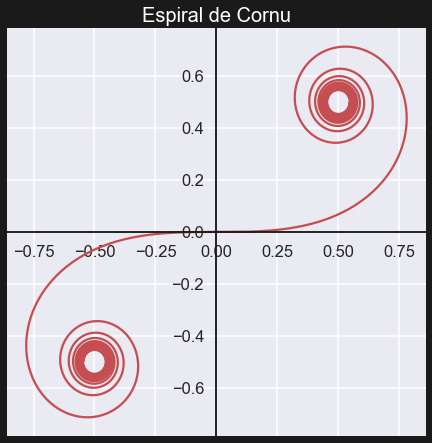

In [ ]:
sns.set_theme()
t = np.linspace(-7, 7, 1000)
y, x = sc.special.fresnel(t)

# Estilizando a plotagem
sns.set_context("talk")
plt.rc('axes', edgecolor = 'k')
plt.rcParams.update({'text.color': "white"})

# Plot
fig, ax = plt.subplots(figsize = (7.5, 7.5), facecolor = 'k')
plt.plot(x, y, 'r')
plt.title('Espiral de Cornu', size = 20)
ax.grid(True, which = 'both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()

# **Métodos:**

In [ ]:
def DIF(Valor):
    DIF = 0
    ResReal = 0.5
    DIF = ResReal - Valor
    return DIF

In [ ]:
'''
module trapezoid
Inew = trapezoid(f,a,b,Iold,k).
Recursive trapezoidal rule:
Iold = Integral of f(x) from x = a to b computed by
trapezoidal rule with 2**(k-1) panels.
Inew = Same integral computed with 2**k panels.
'''

def Trapezio(f, a, b, Iold, k):
    if k == 1 : Inew = (f(a) + f(b)) * (b - a) / 2.0
    else:
        n = 2 ** (k - 2) 
        h = (b - a) / n
        x = a + h / 2.0 
        sum = 0.0
        for i in range(n):  
            sum = sum + f(x)
            x = x + h
        Inew = (Iold + h * sum) / 2.0
    return Inew

def Romberg(f, a, b, tol = 1.0e-6):
    def Richardson(r, k):
        for j in range(k - 1, 0, -1):
            const = 4.0 ** (k - j)
            r[j] = (const * r[j + 1] - r[j]) / (const - 1.0)
        return r
    r = np.zeros(21)
    r[1] = Trapezio(f, a, b, 0.0, 1)
    r_old = r[1]
    for k in range(2, 21):
        r[k] = Trapezio(f, a, b, r[k - 1], k)
        r = Richardson(r, k)
        if abs(r[1] - r_old) < tol * max(abs(r[1]), 1.0):
            return r[1], 2**(k-1)
        r_old = r[1]
    return None, print('Quadratura de Romberg nao converge!')

# Main apenas criacao e declaração de variáveis
ResReal = 0.50000000
Slista = np.zeros(1)
nS = np.zeros(1)
DIFSlista = np.zeros(1)
DIFClista = np.zeros(1)
Clista = np.zeros(1)
nC = np.zeros(1)
S, n = Romberg(s, 0, 10)
Slista[0] = S
DIFSlista[0] = DIF(S)
nS[0] = n
C, n = Romberg(c, 0, 10)
Clista[0] = C
DIFClista[0] = DIF(C)
nC[0] = n
I = (1 / 2) * ((C + (1 / 2)) ** 2 + (S + (1 / 2)) ** 2)
print(S, C, I)


# Usando um dicionário para cada lista de valores
dictR = {'nS' : nS,
        'S(x)' : Slista,
        'DIF(S)' : DIFSlista,
        'nC' : nC,
        'C(x)' : Clista,
        'DIF(C)' : DIFClista}

# Criacao do dataframe 
dfR = pd.DataFrame(dictR)
dfR.index = dfR.index + 1
dfR.head(4)

0.4681699785663224 0.4998986985628082 0.9685752573923554


,nS,S(x),DIF(S),nC,C(x),DIF(C)
1,2048.0,0.46817,0.03183,1024.0,0.499899,0.000101


In [ ]:
def Simpson13(f, a, b, n):
    """
    Calcula a integral de uma funcao f num dado intervalo [a,b]
    usando o metodo de Simpsom 1/3
    Variáveis de entrada 
      f :: Funcao - f(x)
      a e b :: Intervalo de integracao
      n :: Numero de subintervalos (tem que ser par)
    Variáveis de saída:
      I :: Resultado da integral calculada por Simpson 1/3
      h :: Largura dos subintervalos
    """
    
    
    if ((n%2)!=0): # verificando se n é par
        print("Erro! n precisa ser par.")
        I=False
        return I
    h = (b - a) / float(n)
    x = np.linspace(a, b, n + 1)
    F = f(x)
    I = (F[0] + 4 * sum(F[1 : n : 2]) + 2 * sum(F[2 : n - 1 : 2]) + F[n]) * h / 3
    return I, h

nInter = np.arange(42, 122, 2)
Slist = np.zeros(len(nInter))
DIFSlist = np.zeros(len(nInter))
Clist = np.zeros(len(nInter))
DIFClist = np.zeros(len(nInter))
for i in range(len(nInter)):
  print('Subintervalos =', nInter[i])
  S, n1 = Simpson13(s, 0, 10, nInter[i])
  Slist[i], DIFSlist[i] = S, DIF(S)
  print(r'S(x) =', S, '/ Largura dos intervalos =', n1, '/ DIF = ', f'{DIF(S):0.6f}')
  C, n2 = Simpson13(c, 0, 10, nInter[i])
  Clist[i], DIFClist[i] = C, DIF(C)
  print(r'C(x) =', C, '/ Largura dos intervalos =', n2, '/ DIF = ', f'{DIF(C):0.6f}')
  print('\n')

dict = {'n' : nInter,
        'S(x)' : Slist,
        'DIF(S)' : DIFSlist,
        'C(x)' : Clist,
        'DIF(C)' : DIFClist}

Subintervalos = 42
S(x) = 0.8984679795189195 / Largura dos intervalos = 0.23809523809523808 / DIF =  -0.398468
C(x) = -0.8278310350769332 / Largura dos intervalos = 0.23809523809523808 / DIF =  1.327831


Subintervalos = 44
S(x) = -1.6134299936390253 / Largura dos intervalos = 0.22727272727272727 / DIF =  2.113430
C(x) = 0.6929850818882249 / Largura dos intervalos = 0.22727272727272727 / DIF =  -0.192985


Subintervalos = 46
S(x) = 0.2746209134934087 / Largura dos intervalos = 0.21739130434782608 / DIF =  0.225379
C(x) = 1.547630915399967 / Largura dos intervalos = 0.21739130434782608 / DIF =  -1.047631


Subintervalos = 48
S(x) = 0.4397923292380311 / Largura dos intervalos = 0.20833333333333334 / DIF =  0.060208
C(x) = 1.813544953198254 / Largura dos intervalos = 0.20833333333333334 / DIF =  -1.313545


Subintervalos = 50
S(x) = 1.333333333333351 / Largura dos intervalos = 0.2 / DIF =  -0.833333
C(x) = 0.6666666666666726 / Largura dos intervalos = 0.2 / DIF =  -0.166667


Subintervalo

In [ ]:
df = pd.DataFrame(dict)
df.index = df.index + 1
df.head(100)



,n,S(x),DIF(S),C(x),DIF(C)
1,42,0.898468,-0.398468,-0.827831,1.327831
2,44,-1.613430,2.113430,0.692985,-0.192985
3,46,0.274621,0.225379,1.547631,-1.047631
4,48,0.439792,0.060208,1.813545,-1.313545
5,50,1.333333,-0.833333,0.666667,-0.166667
6,52,0.572888,-0.072888,1.027184,-0.527184
7,54,1.228316,-0.728316,0.352435,0.147565
8,56,0.284908,0.215092,0.645316,-0.145316
9,58,1.152907,-0.652907,0.624404,-0.124404
10,60,0.324442,0.175558,0.178807,0.321193


In [ ]:
I = (1 / 2) * ((C + (1 / 2)) ** 2 + (S + (1 / 2)) ** 2)
print(S, C, I)

0.4378590698144957 0.4960205688128438 0.935818304165786
